# Classificação com dados dados desbalanceados

# Carregamento da base de dados

Importações iniciais das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import random

Atribuição dos dados do arquivo para uma variável

In [ ]:
dataset=pd.read_csv("credit_data.csv")

Visualização da variável

In [ ]:
dataset.shape

Visualização dos 5 primeiros dados do dataset

In [ ]:
dataset.head()

Excluir registros com valores nulos

In [ ]:
dataset.dropna(inplace=True)
dataset.shape

Importação da biblioteca de machine learning e visualização dos dados de forma gráfica (OBS: Os dados estão desbalanceados devido haver mais pagadores do que devedores e algoritmos de machine learning trabalham melhor com equivalência)

In [ ]:
import seaborn as sns
sns.countplot(dataset['c#default']);

Atribuí à variável todas as linhas e somente as colunas de 1 à 3

In [ ]:
X = dataset.iloc[:,1:4].values

Visualização do dataset X

In [ ]:
X.shape

Atribuí à variável todas as linhas e somente a coluna 4

In [ ]:
Y = dataset.iloc[:,4].values

Visualizalção do dataset Y

In [ ]:
Y.shape

# Base de Treinamento e Teste

Importada biblioteca para facilitação de amostragem extratificada de dados

In [ ]:
from sklearn.model_selection import train_test_split

Atribui à cada dataset suas devidas quantidades de dados estratificadas. As bases de teste contém 20% da população

In [ ]:
X_Treinamento, X_Teste, Y_Treinamento, Y_Teste = train_test_split(X,Y,test_size =0.2,stratify=Y)

Exibição dos dados contidos nos modelos de treinamento 

In [ ]:
X_Treinamento.shape, Y_Treinamento.shape

((1597, 3), (1597,))

Exibição dos dados contidos nos modelos de teste

In [ ]:
X_Teste.shape, Y_Teste.shape

((400, 3), (400,))

Retorna a quantidade de cada item único dentro do dataset Y

In [ ]:
np.unique(Y,return_counts=True)

(array([0, 1]), array([1714,  283]))

Verificação da distribuição dos valores contidos no dataset Y

In [ ]:
1714 / len(dataset), 283 / len(dataset)

(0.8582874311467201, 0.14171256885327993)

Retorna a quantidade de cada item único dentro do dataset de treinamento Y

In [ ]:
np.unique(Y_Treinamento,return_counts=True)

(array([0, 1]), array([1371,  226]))

Verificação da distribuição dos valores contidos no dataset de treinamento  Y

In [ ]:
1371 / len(Y_Treinamento), 226 / len(Y_Treinamento) 

(0.8584846587351284, 0.14151534126487164)

Retorna a quantidade de cada item único dentro do dataset de teste Y

In [ ]:
np.unique(Y_Teste,return_counts=True)

(array([0, 1]), array([343,  57]))

Verificação da distribuição dos valores contidos no dataset de teste Y

In [ ]:
343 / len(Y_Teste), 57 / len(Y_Teste)

(0.8575, 0.1425)

# Classificação com Naive Bayes

Importa a biblioteca de classificação

In [ ]:
from sklearn.naive_bayes import GaussianNB

Cria o modelo e preenche ele com os dados de treinamento (Maior parte dos dados)

In [ ]:
modelo = GaussianNB()
modelo.fit(X_Treinamento,Y_Treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

Definir variável que conterá as previsões geradas com base nos dados de Teste X (Menor parte dos dados)

In [ ]:
previsoes= modelo.predict(X_Teste)
previsoes

Importar biblioteca para comparar os resultados gerados pelas métricas com os presentes no banco de dados (Dados de teste do eixo Y)

In [ ]:
from sklearn.metrics import accuracy_score

Comparar previsões com os dados de teste e verificar percentual de acertos

In [ ]:
accuracy_score(previsoes,Y_Teste)

0.9275

Importar biblioteca para visualização das métricas de acertos das previsões

In [ ]:
from sklearn.metrics import confusion_matrix

Matriz com os totais de acertos e erros de cada eixo

In [ ]:
cm = confusion_matrix(previsoes, Y_Teste);
cm

array([[339,  25],
       [  4,  32]])

Visualização das previsões do algoritmo (eixo 0,0 e 1,1 são acertos e os 0,1 e 1,0 são os erros.

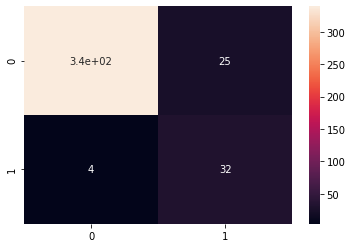

In [ ]:
sns.heatmap(cm,annot=True)

Demonstração de como é feito o cálculo (soma de acertos, eixos 0,0 e 1,1 / soma total de todos os eixos)

In [ ]:
(339+32)/(339+32+25+4)

0.9275

Percentual de acertos para as que pagam os empréstimos (valor no eixo 0,0 / soma da matriz superior)

In [ ]:
339 / (339+25)

0.9313186813186813

Percentual de acertos para as que não pagam os empréstimos (Valor no eixo 1,1 / soma da matriz inferior)

In [ ]:
32 / (32 + 7)

0.8205128205128205

Exemplo de como o percentual pode influenciar. Cálculo de clientes que não serão catalogados corretamente pelo algoritmo

In [ ]:
#Ex: Perdas estimadas por cliente = 5.000
#Ex: Total de Clientes não pagadores =1.000
#Margem de erro 18%
1000 * 18 / 100

180.0

Total de clientes cálculo * valor médio do prejuízo por cliente

In [ ]:
180 * 5000

900000

# SubAmostragem (Undersampling) - Tomek Link

Importar biblioteca para realização de retirada de registros

In [ ]:
from imblearn.under_sampling import TomekLinks

Cria o objeto para realizar a diminuição dos registros marjoritários dentros das bases X e Y, atribuindo o resultado para a x_under e y_under

In [ ]:
tl = TomekLinks(return_indices=True,ratio='majority')
x_under,y_under,id_under= tl.fit_sample(X,Y);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Visualização dos resultados gerados

In [ ]:
x_under.shape, y_under.shape, id_under

((1897, 3), (1897,), array([   0,    1,    2, ..., 1994, 1995, 1996]))

Visualização de valores únicos na base de dados original extraída

In [ ]:
np.unique(Y,return_counts=True)

(array([0, 1]), array([1714,  283]))

Visualização de valores únicos na base de dados gerada

In [ ]:
np.unique(y_under,return_counts=True)

(array([0, 1]), array([1614,  283]))

Realização de amostragem estratificada baseada na nova base de dados. percentual de população nos testes igual à 20% 

In [ ]:
x_treinamento_u, x_teste_u, y_treinamento_u, y_teste_u= train_test_split(x_under,y_under,test_size=0.2,stratify=y_under)

Visualização dos resultados estratificados

In [ ]:
x_treinamento_u.shape, x_teste_u.shape, y_treinamento_u.shape, y_teste_u.shape

((1517, 3), (380, 3), (1517,), (380,))

Criado novo modelo com de predição com base na nova base de dados

In [ ]:
modelo_u=GaussianNB()
modelo_u.fit(x_treinamento_u,y_treinamento_u)
previsoes_u=modelo.predict(x_teste_u)
accuracy_score(previsoes_u,y_teste_u)

0.9105263157894737

Demonstração da matriz de confusão com os percentuais de acertos e erros gerados

In [ ]:
cm_u=confusion_matrix(previsoes_u,y_teste_u)
cm_u

array([[319,  30],
       [  4,  27]])

Percentual de acertos para pagadores

In [ ]:
319 / (319+30)

0.9140401146131805

Percentual de acertos para devedores

In [ ]:
27 / (27+4)

0.8709677419354839

# SobreAmostragem (Oversampling) - SMOTE

Importar biblioteca para criação de registro no elemento com menores quantidades

In [ ]:
from imblearn.over_sampling import SMOTE 

Cria o objeto que preencherá os elementos com menos dados dos datasets e atribuirá o resultado aos mesmos 

In [ ]:
smote = SMOTE(ratio="minority")
x_over, y_over=smote.fit_sample(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Visualização dos resultados gerados

In [ ]:
x_over.shape, y_over.shape

((3428, 3), (3428,))

Mostra a quantidade de valores únicos no dataset original extraído

In [ ]:
np.unique(Y,return_counts=True)

(array([0, 1]), array([1714,  283]))

Mostra a quantidade de valores únicos no dataset gerado

In [ ]:
np.unique(y_over,return_counts=True)

(array([0, 1]), array([1714, 1714]))

Cria as bases de treinamento e teste com base nos datasets gerados. O percentual dos testes é 20%.

In [ ]:
x_treinamento_o, x_teste_o, y_treinamento_o, y_teste_o = train_test_split(x_over,y_over,test_size=0.2,stratify=y_over)

Visualização dos resultados gerados de treinamento e teste

In [ ]:
x_treinamento_o.shape, x_teste_o.shape

((2742, 3), (686, 3))

Cria o modelo com base nos dados de treinamento, resultando nas previsões com base nos testes e demonstrando seu percentual de acertos.

In [ ]:
modelo_o = GaussianNB()
modelo_o.fit(x_treinamento_o,y_treinamento_o)
previsoes_o = modelo_o.predict(x_teste_o)
accuracy_score(previsoes_o,y_teste_o)

0.9198250728862973

Visualização dos acertos e erros nos eixos

In [ ]:
cm_o= confusion_matrix(previsoes_o,y_teste_o)
cm_o

array([[301,  13],
       [ 42, 330]])

Percentual dos acertos dos pagadores

In [ ]:
301 / (301+13)

0.9585987261146497

Percentual dos acertos dos devedores

In [ ]:
330 / (42+330)

0.8870967741935484

Exemplo prejuízo resultante da análise, verificando a quantidade de clientes que não pagaram.

In [ ]:
#Perdas: 5.000
#Clientes não pagadores: 1.000
1000*12/100

120.0

Verifica o valor do prejuízo gerado com base na quantidade de cliente * valor por cliente.

In [ ]:
5000*120

600000

Comparação do prejuízo original (amostragem com dados desbalanceados) com a sobreamostragem

In [ ]:
900000-600000

300000